## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [5]:
print('測試資料集沒有「Survived」欄位')

測試資料集沒有「Survived」欄位


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [6]:
#可以嘗試用範例的程式

#可參考Day23的講義
if df_test.isnull().sum().sum() > 0:
    print('有遺失值，共', df_test.isnull().sum().sum(), '筆')
else:
    print('沒有遺失值')

有遺失值，共 414 筆


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [7]:
#合併資料
#df_all = df_test.append(df_train)
df_all = df_train.append(df_test)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
# 以 Cabin 為例，先看 Cabin  出現值的特性
df_all["Cabin"].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
B96 B98            4
                  ..
E39 E41            1
C128               1
B82 B84            1
B61                1
C110               1
Name: Cabin, Length: 186, dtype: int64

In [9]:
# 清查一下 Cabin 缺漏資料的分佈狀態
df_all["Cabin"] = df_all['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoData')
# str(x)[0] : 將 Cabin 的欄位值取出，然後只抓取「第一個字元」的英文字，將艙等歸類
df_all["Cabin"].unique()

array(['NoData', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

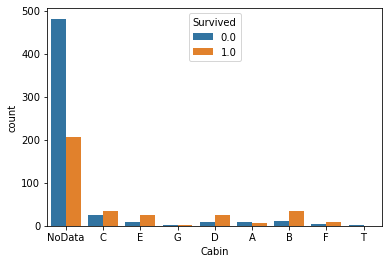

In [10]:
# 看一下調整後的狀態(透過圖形)
sns.countplot(df_all['Cabin'], hue=df_all['Survived'])

In [11]:
print('從缺漏的資料來看，數量非常的多，因此無法隨意補值。\n又生存的人數來看，缺漏的資料來看，死亡的人數佔比較高')

從缺漏的資料來看，數量非常的多，因此無法隨意補值。
又生存的人數來看，缺漏的資料來看，死亡的人數佔比較高
